In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
df = pd.read_csv('./2020.csv', encoding='windows-1252')
df

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


# 1. Tổng quan

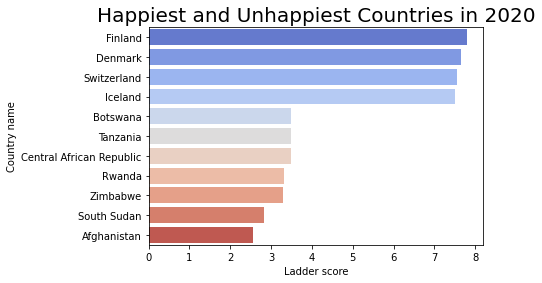

In [4]:
df_happiest_unhappiest= df[(df.loc[:, "Ladder score"]>7.5)|(df.loc[:, "Ladder score"]<3.5)]
sns.barplot(x="Ladder score", y="Country name", data=df_happiest_unhappiest, palette="coolwarm")
plt.title("Happiest and Unhappiest Countries in 2020", size=20)
plt.show()

# 2. Phân tích

## 2.1 GDP

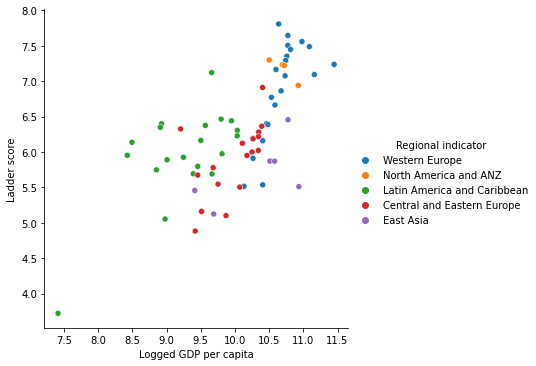

In [5]:
for col in df[['Logged GDP per capita']]:
    sns.relplot(
        data = df[df['Regional indicator'].isin(df.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5].index)],
        x= col, y="Ladder score",
        hue="Regional indicator")
    plt.show()

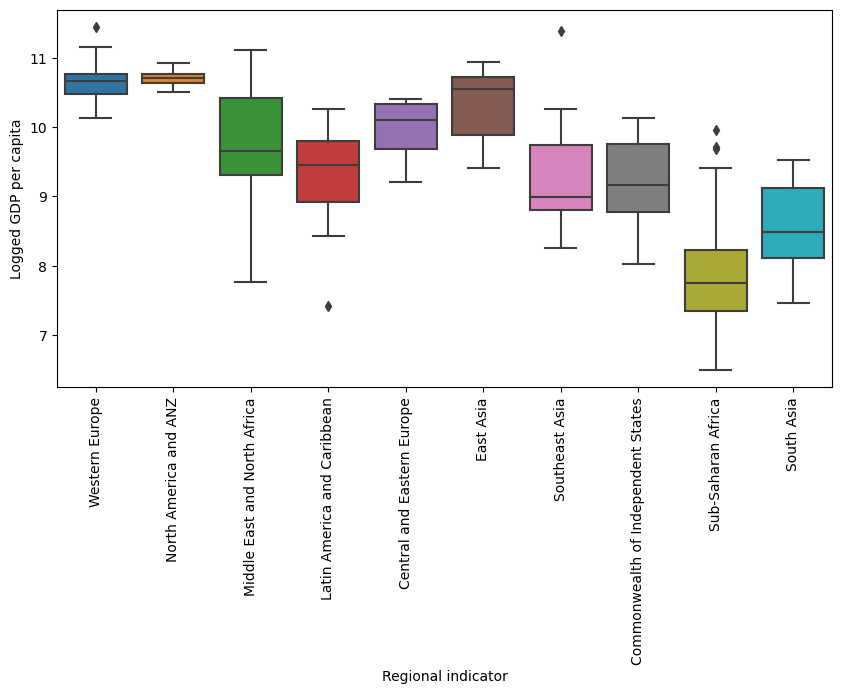

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10, 5), dpi=100)
ax.tick_params(axis = 'x', which = 'major', labelsize = 10, rotation=90)
ax = sns.boxplot(x="Regional indicator", y="Logged GDP per capita", data=df)

## 2.2. Hỗ trợ xã hội

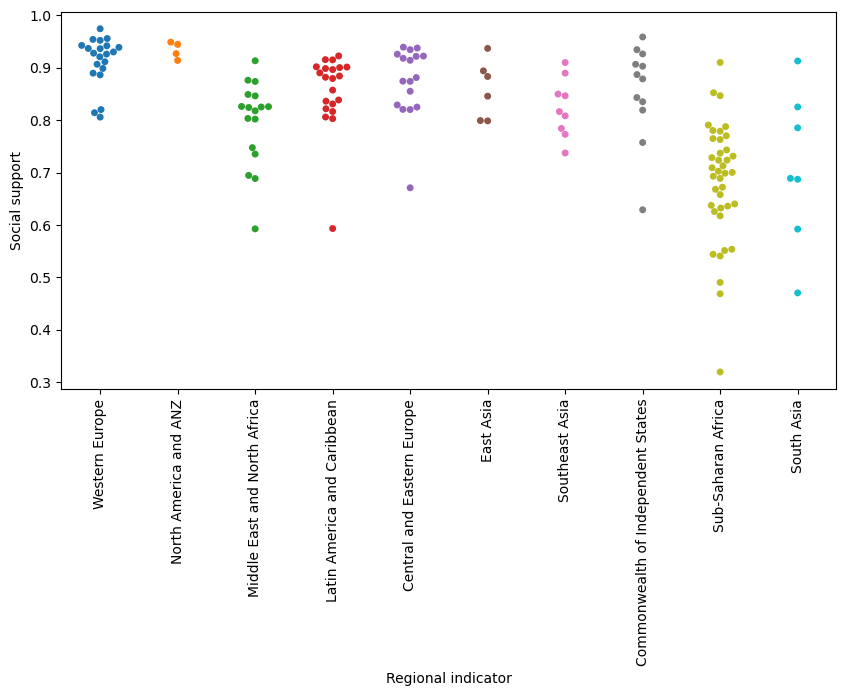

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10, 5), dpi=100)
ax.tick_params(axis = 'x', which = 'major', labelsize = 10, rotation=90)
ax = sns.swarmplot(x="Regional indicator", y="Social support", data=df)

## 2.3. Kỳ vọng sống lành mạnh

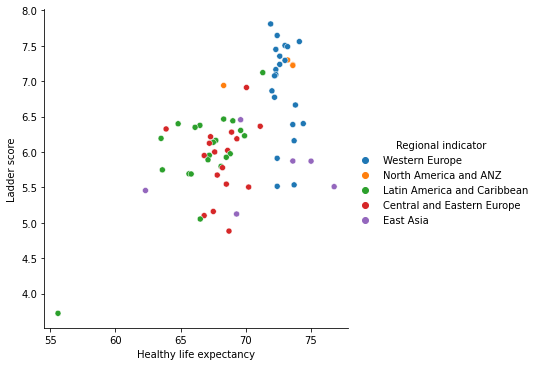

In [10]:
for col in df[['Healthy life expectancy']]:
    sns.relplot(
        data = df[df['Regional indicator'].isin(df.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5].index)],
        x= col, y="Ladder score",
        hue="Regional indicator")
    plt.show()

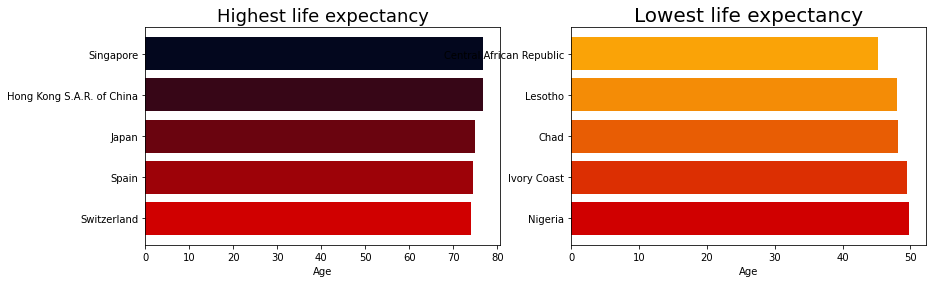

In [5]:
tmpdf=df.sort_values('Healthy life expectancy',ascending=False)
h_life=tmpdf[['Country name','Healthy life expectancy']].head(5)
l_life=tmpdf[['Country name','Healthy life expectancy']].tail(5)

h_life=h_life.sort_values('Healthy life expectancy',ascending=True)
# l_life=l_life.sort_values('Healthy life expectancy',ascending=True)

fig,ax=plt.subplots(1,2,figsize=(14,4))
dark_red=["#03071e","#370617","#6a040f","#9d0208","#d00000","#dc2f02","#e85d04","#f48c06","#faa307","#ffba08"]


ax[0].barh(h_life['Country name'],h_life['Healthy life expectancy'],color=dark_red[4::-1])
ax[0].set_title('Highest life expectancy',fontsize=18)
ax[0].set_xlabel('Age')

ax[1].barh(l_life['Country name'],l_life['Healthy life expectancy'],color=dark_red[4:10])
ax[1].set_title('Lowest life expectancy',fontsize=20)
ax[1].set_xlabel('Age')
plt.show()

## 2.4. Quyền tự do chọn cuộc sống

In [7]:
dna =df.loc[df['Regional indicator']=='Southeast Asia',:]

In [8]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [9]:
fig = px.line(data_frame=dna,x ="Country name",y="Freedom to make life choices",hover_name="Freedom to make life choices")
fig.show()

NameError: name 'px' is not defined

## 2.5. Sự hào phóng

In [11]:
df4=df.sort_values('Generosity',ascending=False).head(15)

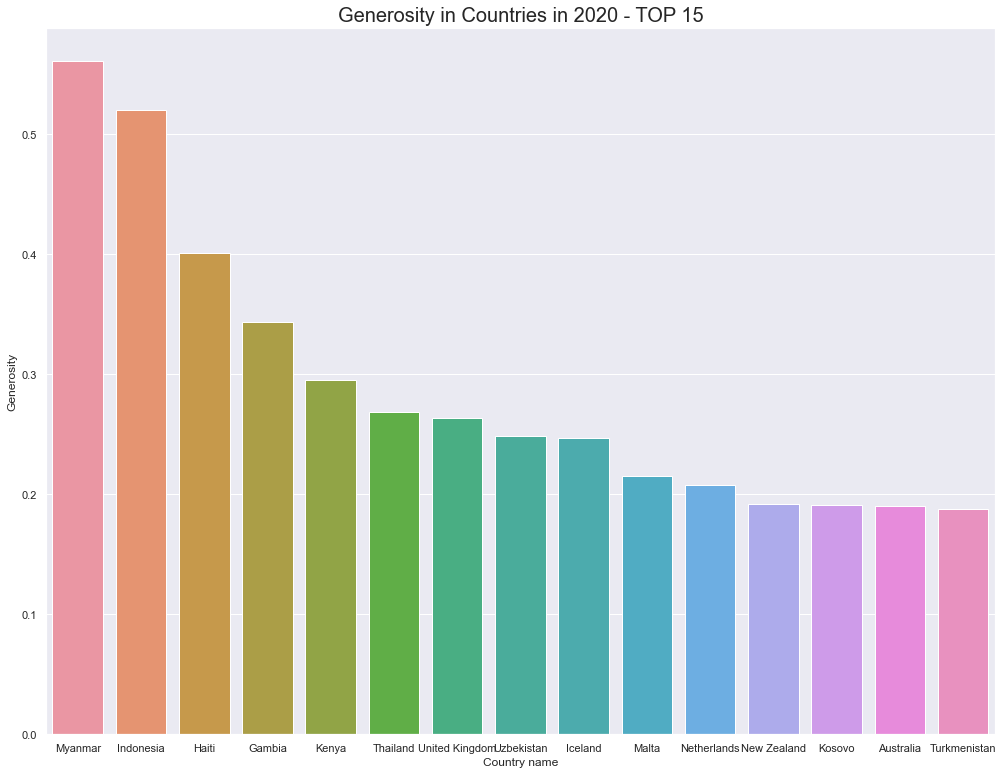

In [13]:
sns.set(rc={'figure.figsize':(17,13)})
sns.barplot(x="Country name", y="Generosity", data=df4) 
plt.title("Generosity in Countries in 2020 - TOP 15", size=20)
plt.show()

## 2.6. Nhận thức về tham nhũng

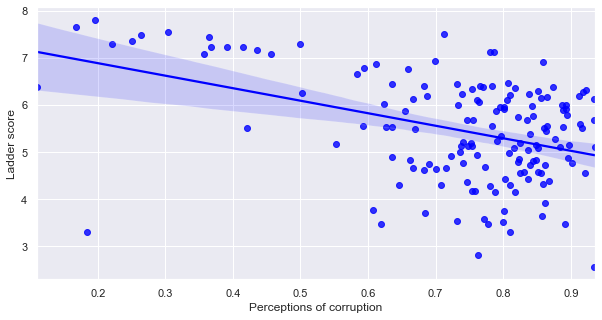

In [18]:
cols=['Perceptions of corruption']
for a in cols:
    plt.figure(figsize=(10,5))
    sns.regplot(x=a,y='Ladder score',data=df,color='blue')
    plt.show()

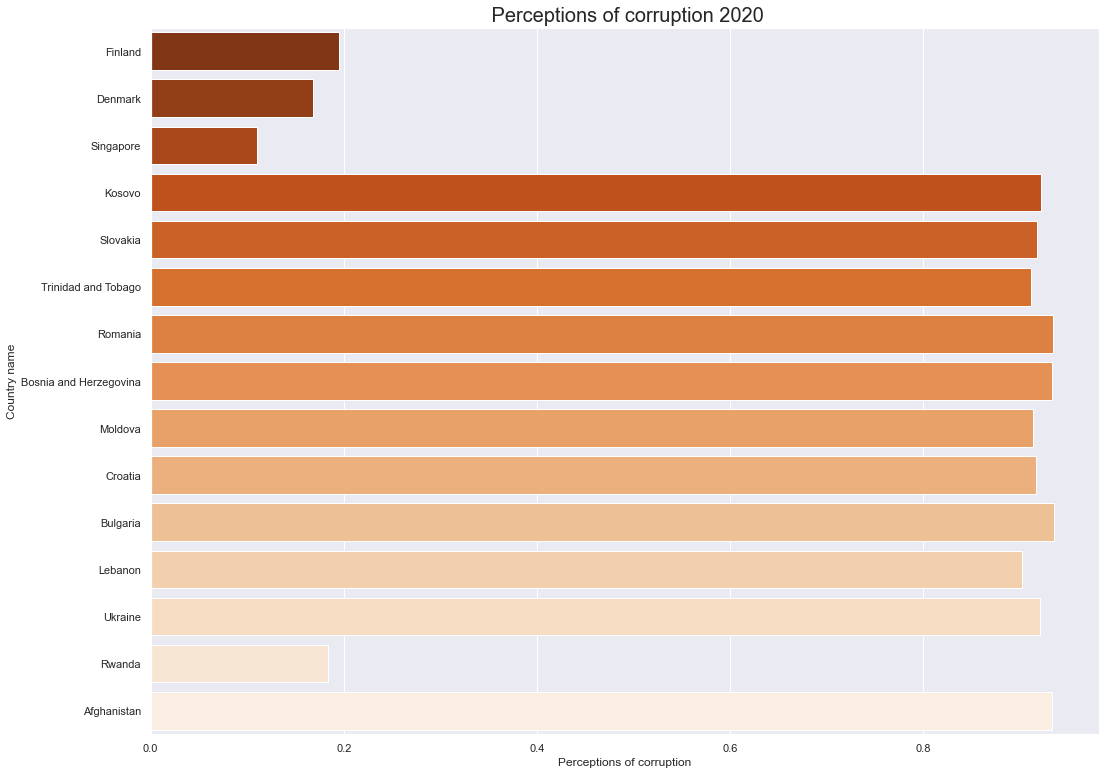

In [14]:
df1= df[(df.loc[:, "Perceptions of corruption"]>0.9)|(df.loc[:, "Perceptions of corruption"]<0.2)]
sns.barplot(x="Perceptions of corruption", y="Country name", data=df1, palette="Oranges_r")
plt.title(" Perceptions of corruption 2020", size=20)
plt.show()